In [1]:
from load_data import *
from models import *
from utils import *
from collections import defaultdict

from torch.optim import Adam,AdamW,NAdam
from torch.optim.lr_scheduler import ReduceLROnPlateau

/work/u7412932/myenv/.package_yolov7_v2_nchc_conda/envs/yolov7_v2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
label_weight=[0.06782336188800699, 0.09278373618689278, 0.45695990072044707, 0.12104898032329722, 0.19039995863351958, 0.07098406224783643]
criterion = focal_loss(alpha=label_weight, gamma=2, reduction='mean')

model=EfficientNetB0() #Resnet50
model.to(device)
mode='EfficientNetB0' #Resnet50

history=defaultdict(list)
optimizer = torch.optim.AdamW(params =  model.parameters(), lr=0.001, weight_decay=0.00001,capturable=True)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)
n_epochs=50

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /home/u7412932/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 73.0MB/s]


In [4]:
train_model(n_epochs, train_data_loader,val_data_loader, model,device,criterion,
                optimizer, scheduler,history,mode)

############# Epoch 1: Training Start   #############
############# Epoch 1: Training End     #############
############# Epoch 1: Validation Start   #############
############# Epoch 1: Validation End     #############
Epoch: 1 	Average Training Loss: 0.031411 	Training ACC: 0.798714  	Average Validation Loss: 0.041004 	Validation ACC: 0.766798 
Validation loss decreased (inf --> 0.041004).  Saving model ...
############# Epoch 1  Done   #############

############# Epoch 2: Training Start   #############
############# Epoch 2: Training End     #############
############# Epoch 2: Validation Start   #############
############# Epoch 2: Validation End     #############
Epoch: 2 	Average Training Loss: 0.006989 	Training ACC: 0.943620  	Average Validation Loss: 0.025011 	Validation ACC: 0.873518 
Validation loss decreased (0.041004 --> 0.025011).  Saving model ...
############# Epoch 2  Done   #############

############# Epoch 3: Training Start   #############
############# Epoch 3: Tr

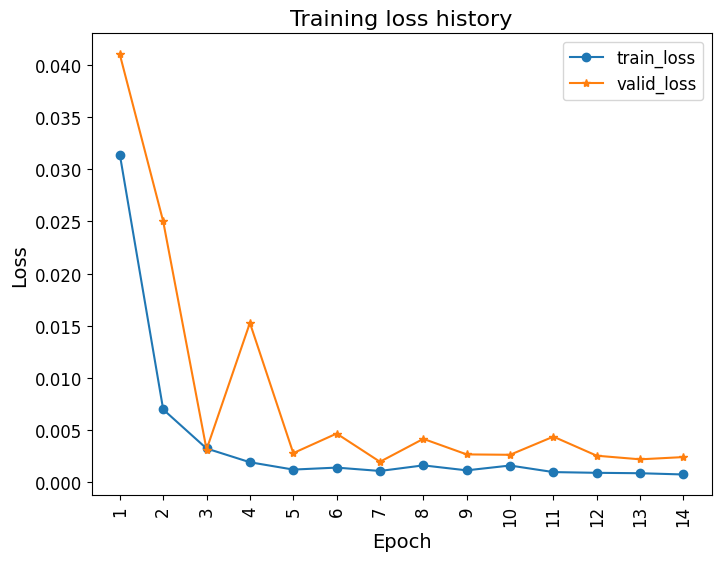

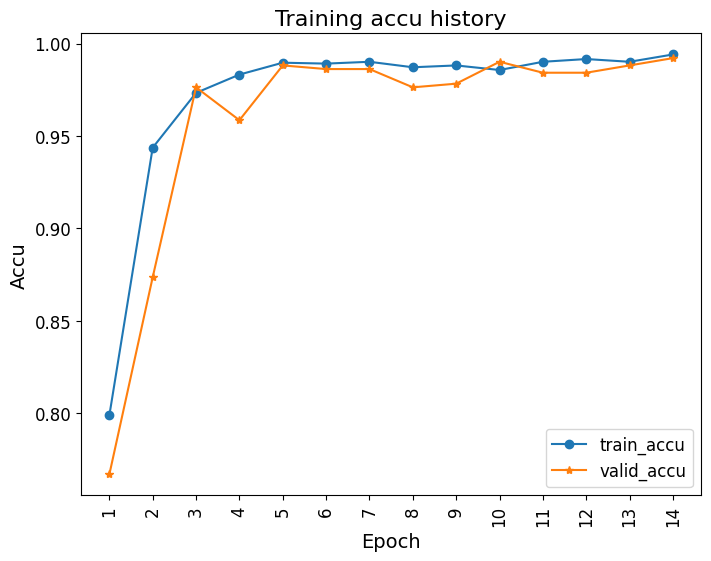

In [5]:
plot_result(history)

In [6]:
torch.cuda.empty_cache()

In [7]:
history_df = pd.DataFrame(history)

In [8]:
history_df.head()

,epoch,train_accu,train_loss,valid_accu,valid_loss
0,1,0.798714,0.031411,0.766798,0.041004
1,2,0.943620,0.006989,0.873518,0.025011
2,3,0.973294,0.003250,0.976285,0.003150
3,4,0.983185,0.001933,0.958498,0.015284
4,5,0.989614,0.001229,0.988142,0.002805


In [9]:
history_df.to_csv('train_log/log_{}.csv'.format(mode),index=False)